# IFEST UNPAD - Data Analysis Competition

## Library

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

## Initial Setup

Reading CSV

In [51]:
df = pd.read_csv('Data - Kualifikasi.csv', sep=';')

In [52]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,"3,5",DKV
1,Abbey Carpenter,Wanita,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4,FIKOM
2,Abbey Dubois,Wanita,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,"4,5",FIKOM
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,"5,5",DKV
4,Abbey Logan,Wanita,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,"6,5",DKV


## Data Cleansing

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama               11499 non-null  object
 1   Gender             11499 non-null  object
 2   Tinggal_Dengan     7517 non-null   object
 3   Status_Kerja       11499 non-null  object
 4   Biaya              7720 non-null   object
 5   Tgl_Daftar_Kuliah  11499 non-null  int64 
 6   Alamat             11499 non-null  object
 7   UKM                11499 non-null  object
 8   Organisasi_Kampus  11499 non-null  object
 9   Lama_Kuliah        11499 non-null  object
 10  Fakultas           11499 non-null  object
dtypes: int64(1), object(10)
memory usage: 988.3+ KB


Null data plot

In [54]:
df.isna().sum()

Nama                    0
Gender                  0
Tinggal_Dengan       3982
Status_Kerja            0
Biaya                3779
Tgl_Daftar_Kuliah       0
Alamat                  0
UKM                     0
Organisasi_Kampus       0
Lama_Kuliah             0
Fakultas                0
dtype: int64

<AxesSubplot:>

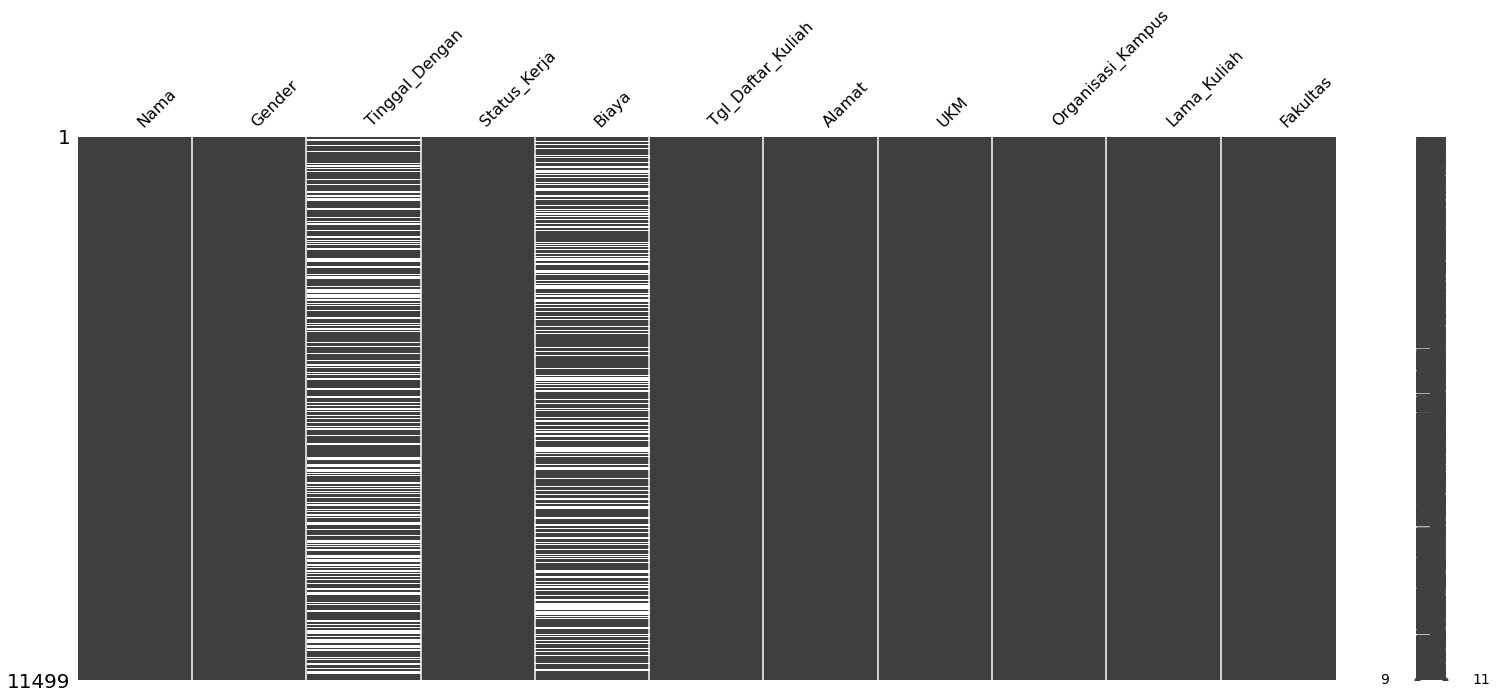

In [55]:
msno.matrix(df)

### Checking unique data of each label

In [56]:
for label in df:
    print(label + ':')
    print(df[label].unique())

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']
Gender:
['Pria' 'Wanita']
Tinggal_Dengan:
['Kos' nan 'Orang Tua']
Status_Kerja:
['Belum' 'Bekerja']
Biaya:
['Beasiswa' nan 'Orang Tua']
Tgl_Daftar_Kuliah:
[2008 2009 2007]
Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']
UKM:
['UKM_3' 'UKM_2' 'UKM_4' 'UKM_1' 'Tidak']
Organisasi_Kampus:
['Ya' 'Tidak']
Lama_Kuliah:
['3,5' '4' '4,5' '5,5' '6,5' '5' '6' '7']
Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']


Handling null data

In [60]:
df['Tinggal_Dengan'] = df['Tinggal_Dengan'].fillna('Sendiri')
df['Biaya'] = df['Biaya'].fillna('Mandiri')

KeyError: 'Biaya'

In [59]:
df.isnull().any()

Nama                 False
Gender               False
Tinggal_Dengan        True
Status_Kerja         False
Biaya                 True
Tgl_Daftar_Kuliah    False
Alamat               False
UKM                  False
Organisasi_Kampus    False
Lama_Kuliah          False
Fakultas             False
dtype: bool

## Data Preparation